<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374

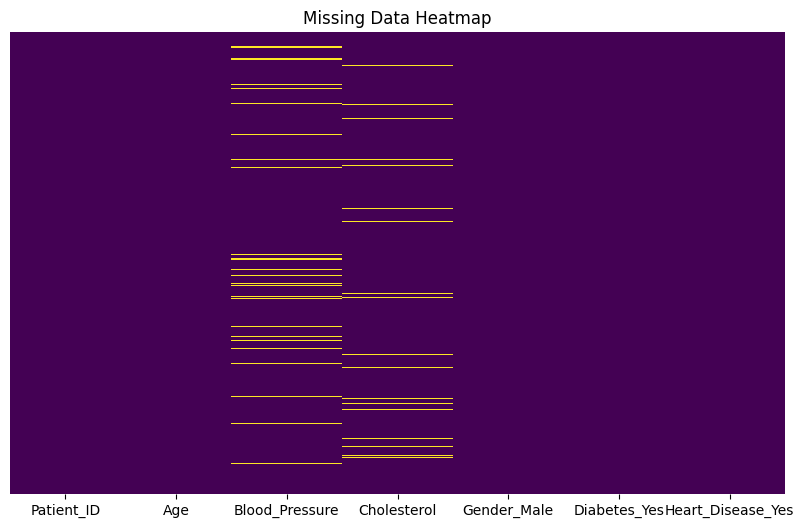

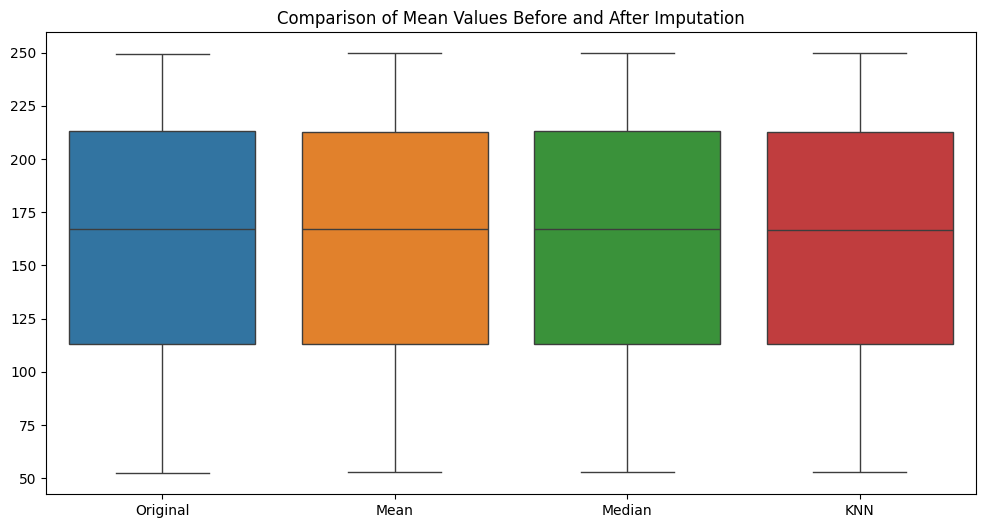

In [4]:
# day-15
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

data = pd.read_csv("/content/Day_15_Healthcare_Data.csv")

print(data.info())
print(data.describe())
print(data.isna().sum())

data = pd.get_dummies(data, drop_first=True)

missing_percentage = (data.isna().sum() / len(data)) * 100
print(missing_percentage)

plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

num_cols = data.select_dtypes(include=['number']).columns
data_mean_imputed = data.copy()
for col in num_cols:
    data_mean_imputed[col] = data[col].fillna(data[col].mean())
data_median_imputed = data.copy()
for col in num_cols:
    data_median_imputed[col] = data[col].fillna(data[col].median())
data_mode_imputed = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    data_mode_imputed[col] = data[col].fillna(data[col].mode()[0])
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = data.copy()
data_knn_imputed[num_cols] = knn_imputer.fit_transform(data_knn_imputed[num_cols])
reg_data = data.copy()
for col in num_cols:
    if reg_data[col].isna().sum() > 0:
        train_data = reg_data.dropna(subset=[col])
        test_data = reg_data[reg_data[col].isna()]

        X_train = train_data.drop(columns=[col])
        y_train = train_data[col]
        X_test = test_data.drop(columns=[col])

        X_train = X_train.fillna(X_train.mean())
        X_test = X_test.fillna(X_test.mean())

        if not X_test.empty:
            model = LinearRegression()
            model.fit(X_train, y_train)
            reg_data.loc[reg_data[col].isna(), col] = model.predict(X_test)
imputed_means = pd.DataFrame({
    'Original': data.dropna()[num_cols].mean(),
    'Mean': data_mean_imputed[num_cols].mean(),
    'Median': data_median_imputed[num_cols].mean(),
    'KNN': data_knn_imputed[num_cols].mean()
})
plt.figure(figsize=(12, 6))
sns.boxplot(data=imputed_means)
plt.xticks(range(len(imputed_means.columns)), imputed_means.columns)
plt.title('Comparison of Mean Values Before and After Imputation')
plt.show()
data_mean_imputed.to_csv('healthcare_mean_imputed.csv', index=False)
data_median_imputed.to_csv('healthcare_median_imputed.csv', index=False)
data_mode_imputed.to_csv('healthcare_mode_imputed.csv', index=False)
data_knn_imputed.to_csv('healthcare_knn_imputed.csv', index=False)
reg_data.to_csv('healthcare_regression_imputed.csv', index=False)

In [5]:
# day-16
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

data = pd.read_csv("/content/Day_16_Healthcare_Data.csv")

print("Initial Data Info:")
print(data.info())
print("\nMissing Values:\n", data.isna().sum())
print("\nDuplicate Rows:", data.duplicated().sum())

num_cols = data.select_dtypes(include=['number']).columns
cat_cols = data.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

data.drop_duplicates(inplace=True)

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print("\nFinal Data Info:")
print(data.info())
print("\nMissing Values After Cleaning:\n", data.isna().sum())
print("\nDuplicate Rows After Cleaning:", data.duplicated().sum())

data.to_csv("healthcare_cleaned.csv", index=False)
print("\nCleaned dataset saved successfully!")

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None

Missing Values:
 Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

Duplicate Rows: 5

Final Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  


<ipython-input-5-8ffa6a730c8d>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
# day-17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Booking_ID     505 non-null    int64  
 1   Destination    478 non-null    object 
 2   Package_Price  485 non-null    float64
 3   Customer_Age   490 non-null    float64
 4   Rating         480 non-null    float64
 5   Review_Text    485 non-null    object 
 6   Travel_Date    495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
None
       Booking_ID  Package_Price  Customer_Age      Rating
count  505.000000     485.000000    490.000000  480.000000
mean   251.774257    2769.338144     42.934694    3.116667
std    144.804413    1287.538771     15.255956    1.129844
min      1.000000     500.000000     18.000000    1.000000
25%    127.000000    1658.000000     30.000000    2.000000
50%    252.000000    2802.000000     42.000000    3.000000
75%    378.000000  

<ipython-input-6-88819d9fdaa8>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Review_Text'].fillna("No review provided", inplace=True)


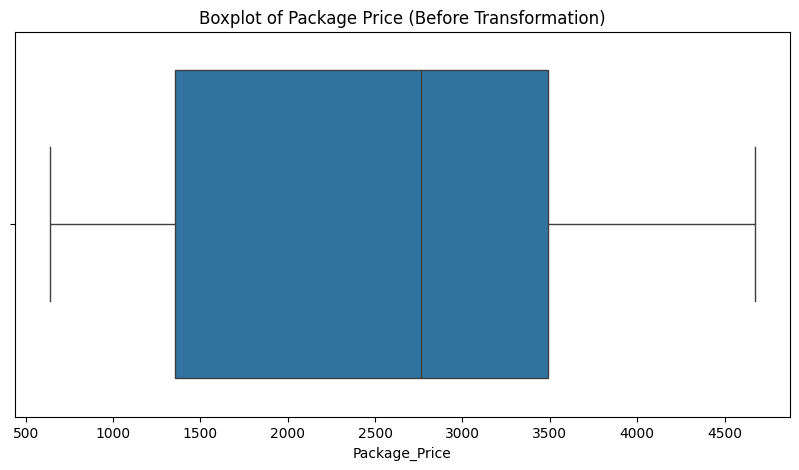

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 16
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Booking_ID     6 non-null      int64  
 1   Destination    6 non-null      int64  
 2   Package_Price  6 non-null      float64
 3   Customer_Age   6 non-null      float64
 4   Rating         6 non-null      float64
 5   Review_Text    6 non-null      object 
 6   Travel_Date    6 non-null      object 
dtypes: float64(3), int64(2), object(2)
memory usage: 384.0+ bytes
None
Remaining missing values:
 Booking_ID       0
Destination      0
Package_Price    0
Customer_Age     0
Rating           0
Review_Text      0
Travel_Date      0
dtype: int64
Duplicates remaining: 0
Data cleaning completed successfully!


In [6]:
# day-18
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from textblob import TextBlob
data = pd.read_csv("/content/Day_18_Tours_and_Travels.csv")
print(data.info())
print(data.describe())
print("Missing values:\n", data.isna().sum())
num_imputer = SimpleImputer(strategy='median')
data['Customer_Age'] = num_imputer.fit_transform(data[['Customer_Age']])
data['Rating'] = data['Rating'].apply(lambda x: np.nan if x not in range(1, 6) else x)
data['Rating'] = num_imputer.fit_transform(data[['Rating']])
data['Review_Text'].fillna("No review provided", inplace=True)
data = data.drop_duplicates(subset=['Review_Text'], keep='first')
data['Rating'] = data['Rating'].clip(1, 5)
def correct_spelling(text):
    return str(TextBlob(text).correct()) if pd.notna(text) else text
data['Destination'] = data['Destination'].apply(correct_spelling)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Package_Price'])
plt.title("Boxplot of Package Price (Before Transformation)")
plt.show()
data['Package_Price'] = np.log1p(data['Package_Price'])
label_enc = LabelEncoder()
data['Destination'] = label_enc.fit_transform(data['Destination'])
scaler = StandardScaler()
data[['Customer_Age', 'Package_Price']] = scaler.fit_transform(data[['Customer_Age', 'Package_Price']])
print(data.info())
print("Remaining missing values:\n", data.isna().sum())
print("Duplicates remaining:", data.duplicated().sum())
data.to_csv("cleaned_travel_reviews.csv", index=False)
print("Data cleaning completed successfully!")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
None
Order_ID            0.000000
Product_Category    4.752475
Product_Price       3.960396
Customer_Age        2.970297
Rating              4.950495
Review_Text         4.158416
Order_Date          1.980198
dtype: float64


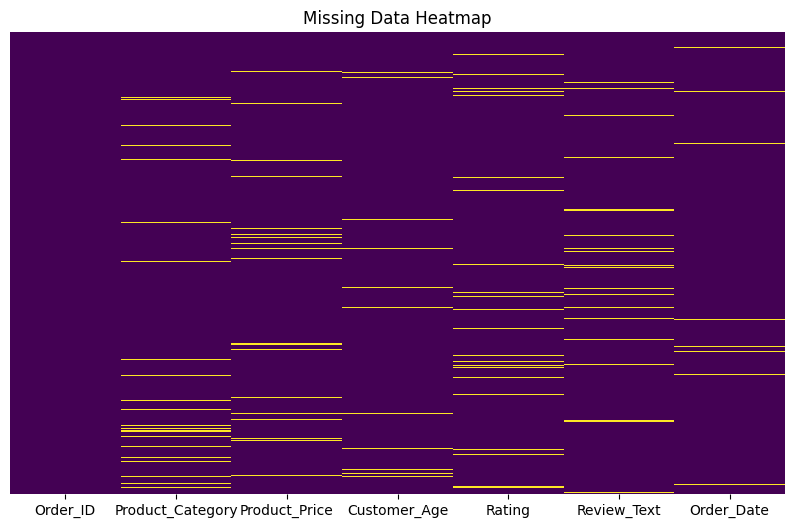

<ipython-input-7-4583585fed3c>:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[col] = data[col].fillna(method='ffill')


         Order_ID  Product_Category  Product_Price  Customer_Age      Rating  \
count  505.000000        505.000000     505.000000    490.000000  480.000000   
mean   249.899010          2.160396    2442.748515     42.144898    3.197917   
min      1.000000          0.000000     108.000000     18.000000    1.000000   
25%    124.000000          1.000000    1292.000000     30.000000    2.000000   
50%    250.000000          2.000000    2464.000000     41.000000    3.000000   
75%    375.000000          3.000000    3588.000000     55.000000    4.000000   
max    500.000000          4.000000    4993.000000     69.000000    5.000000   
std    144.769438          1.324381    1387.499472     14.901086    1.145198   

                          Order_Date  
count                            505  
mean   2023-09-06 21:06:03.564356352  
min              2023-01-01 00:00:00  
25%              2023-05-04 00:00:00  
50%              2023-09-07 00:00:00  
75%              2024-01-09 00:00:00  
max   

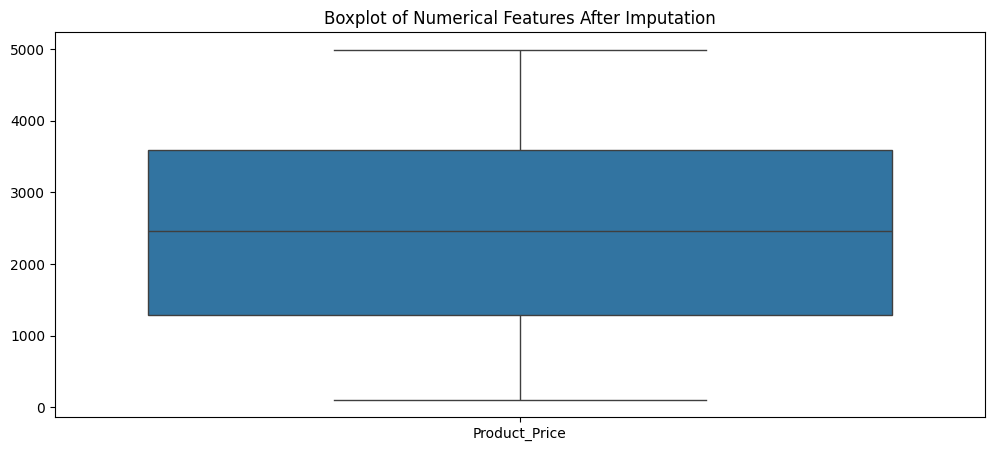

Data Cleaning Completed Successfully!


In [7]:
# day-19
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("/content/Day 19_E-Commerce_Data.csv")
print(data.info())
missing_percent = data.isna().sum() / len(data) * 100
print(missing_percent)
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()
num_cols = [col for col in ['Product_Price', 'Order_Amount'] if col in data.columns]
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())
cat_cols = [col for col in ['Product_Category', 'Customer_Country'] if col in data.columns]
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])
date_cols = [col for col in ['Order_Date', 'Shipping_Date'] if col in data.columns]
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')
    data[col] = data[col].fillna(method='ffill')
if 'Order_Amount' in data.columns:
    knn_imputer = KNNImputer(n_neighbors=5)
    data[num_cols] = knn_imputer.fit_transform(data[num_cols])
label_enc = LabelEncoder()
for col in cat_cols:
    data[col] = label_enc.fit_transform(data[col])
print(data.describe())
plt.figure(figsize=(12, 5))
sns.boxplot(data=data[num_cols])
plt.title("Boxplot of Numerical Features After Imputation")
plt.show()
data.to_csv("cleaned_ecommerce_orders.csv", index=False)
print("Data Cleaning Completed Successfully!")

Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64
Number of duplicate records: 5


<ipython-input-8-3cf8e2032be3>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review_Text'].fillna('No review provided', inplace=True)


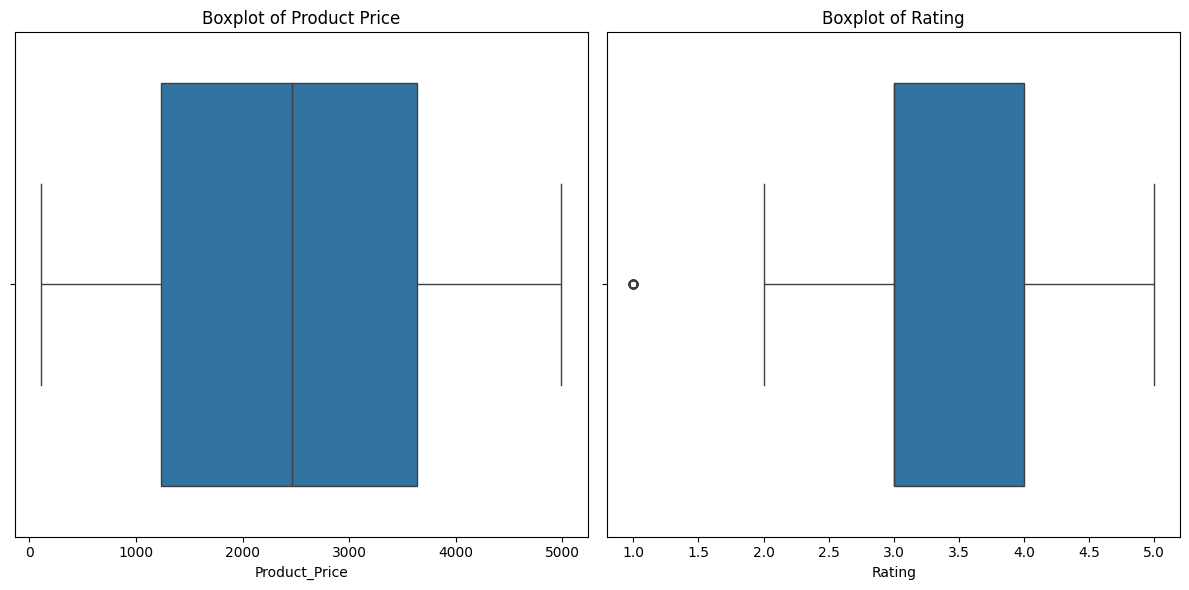

   Order_ID  Product_Category  Product_Price  Customer_Age  Rating  \
0         1                 2         3262.0          58.0     3.0   
1         2                 2          214.0          20.0     3.0   
2         3                 4         3429.0          51.0     2.0   
3         4                 1         4568.0          35.0     3.0   
4         5                 3         2237.0          32.0     4.0   

           Review_Text  Order_Date  
0  Would not recommend  2023-01-01  
1   Excellent product!  2023-01-02  
2      Value for money  2023-01-03  
3      Value for money  2023-01-04  
4      Not as expected  2023-01-05  


In [8]:
# day-20
import pandas as pd
import numpy as np
import nltk
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/Day 20_E-Commerce_Data.csv")
print(df.isnull().sum())
numerical_columns = ['Rating', 'Customer_Age']
imputer = SimpleImputer(strategy='median')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])
df['Review_Text'].fillna('No review provided', inplace=True)
print(f"Number of duplicate records: {df.duplicated().sum()}")
df = df.drop_duplicates()
df['Rating'] = df['Rating'].apply(lambda x: min(max(x, 1), 5))
df['Product_Category'] = df['Product_Category'].str.lower()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Product_Price'])
plt.title('Boxplot of Product Price')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Rating'])
plt.title('Boxplot of Rating')
plt.tight_layout()
plt.show()
Q1_price = df['Product_Price'].quantile(0.25)
Q3_price = df['Product_Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
Q1_rating = df['Rating'].quantile(0.25)
Q3_rating = df['Rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating
df = df[(df['Product_Price'] >= lower_bound_price) & (df['Product_Price'] <= upper_bound_price)]
df = df[(df['Rating'] >= lower_bound_rating) & (df['Rating'] <= upper_bound_rating)]
label_encoder = LabelEncoder()
df['Product_Category'] = label_encoder.fit_transform(df['Product_Category'])
df.to_csv('cleaned_ecommerce_reviews.csv', index=False)
print(df.head())